# **Project Title:** Predicting Student Performance

#### **Problem Statement**

Students’ academic performance is shaped by many factors; how much they study, their past results, how well they sleep, and even whether they engage in extracurricular activities. Yet, it’s often unclear which of these factors matter most. This project aims to build a predictive model that uses such information to estimate a student’s performance index. The goal is to uncover the key drivers of success and provide insights that can help students, teachers, and parents take practical steps to improve learning outcomes.

#### **Objective** 

Predict Students' academic performance based on various factors

#### **Dataset Description**

The dataset used in this project contains 10,000 records of student-related attributes that influence academic performance. It is a structured dataset with both numerical and categorical variables.

- Number of Rows (Observations): 10,000


- Number of Columns (Features): 6


Features (Independent Variables / Predictors):

1. Hours Studied (int): Average number of study hours per day.


2. Previous Scores (int): Average performance in past academic assessments.


3. Extracurricular Activities (binary / categorical): Indicates student participation in extracurricular activities (e.g., 0 = No, 1 = Yes).


4. Sleep Hours (int): Average number of hours of sleep per day.


5. Sample Question Papers Practiced (int): Number of past exam/sample papers practiced by the student.


Target Variable (Dependent Variable):

- Performance Index (float): A numerical score ranging from 10 to 100, representing the student’s overall academic performance index.

### **Import Required Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### **Loading dataset**

In [2]:
# Read the CSV file
Sp_df = pd.read_csv("Student_Performance.csv")

#### **Explore dataset**

In [3]:
# Display first few rows
Sp_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Display last few rows
Sp_df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
# Display dataset information
Sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
Sp_df.shape

(10000, 6)

In [7]:
Sp_df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [8]:
# List all columns
Sp_df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [9]:
# Quick stats
Sp_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
# Check for missing values
Sp_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
# Check for duplicate
Sp_df.duplicated().sum()

np.int64(127)

In [12]:
Sp_df.duplicated().value_counts()

False    9873
True      127
Name: count, dtype: int64

#### **Make all the necessary cleaning**

In [13]:
Sp_df.drop_duplicates()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [14]:
Sp_df = Sp_df.drop_duplicates()

In [15]:
Sp_df.shape

(9873, 6)

**Observation:**

It has 10,000 rows and 6 columns

There are no missing values

There are 127 duplicate rows in the dataset that were deleted

The columns has their right datatypes

#### **Visualization of dataset**

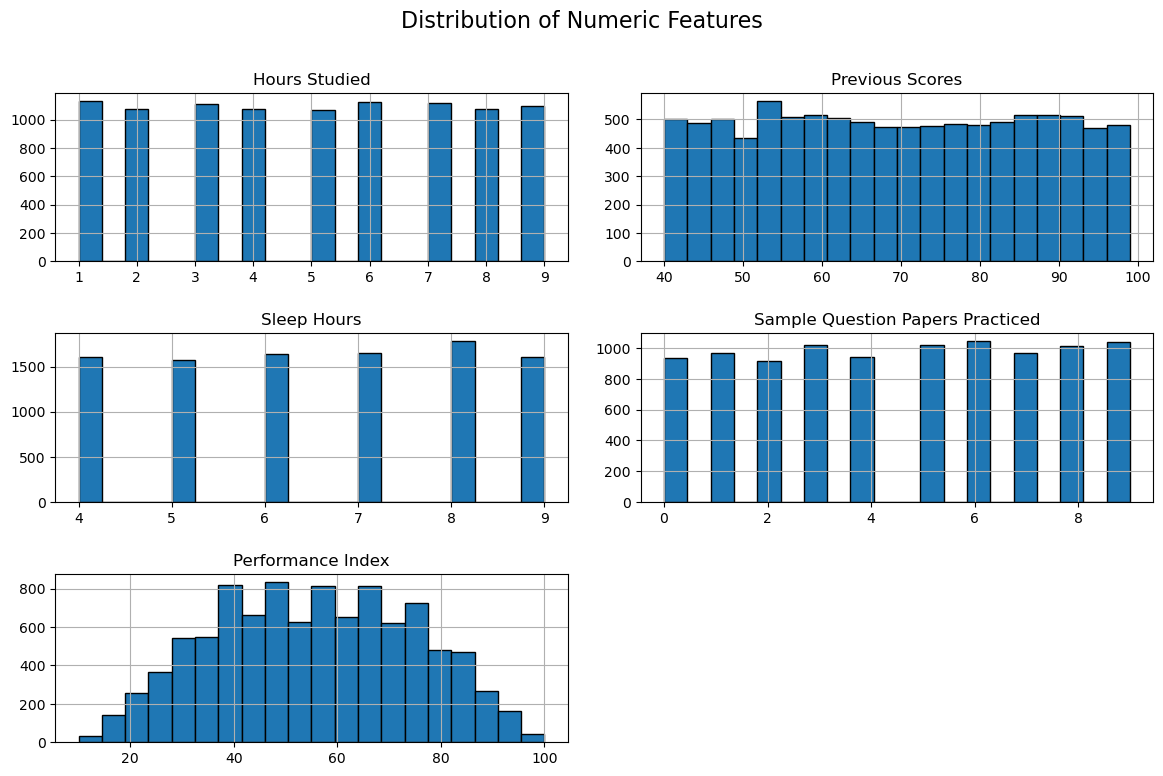

In [16]:
# Visualize Distributions (Histograms)

# Plot distribution of each numeric feature
Sp_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap
plt.savefig('Feature Distributions.png', dpi = 300)
plt.show()

Correlation Matrix & Heatmap (Check Multicollinearity)

In [17]:
# Convert Yes/No to numeric
Sp_df['Extracurricular Activities'] = Sp_df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [18]:
# Correlation matrix
corr = Sp_df.corr()
corr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


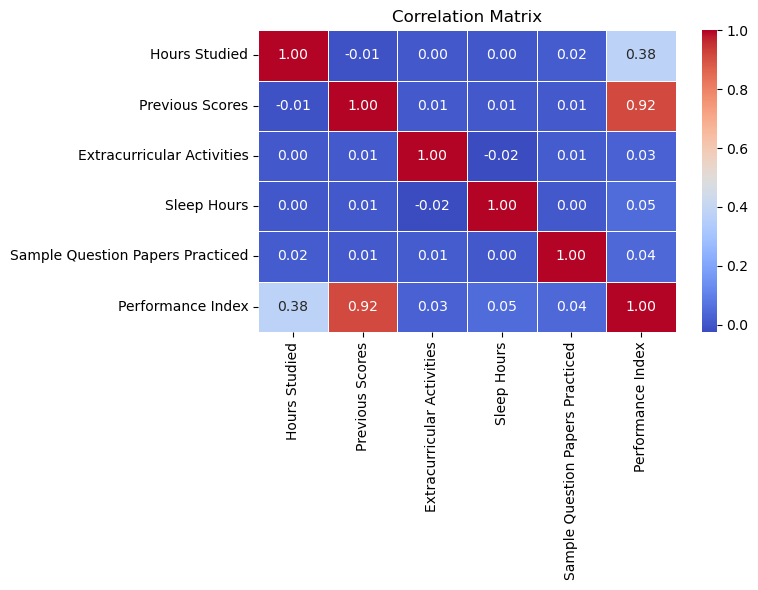

In [19]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()  # Adjusts layout so labels are visible
plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi= 300)
plt.show()

In [20]:
# Correlation Explanation & Performance Index Relationship
correlation_values = Sp_df.corr()["Performance Index"].sort_values(ascending=False)

In [21]:
print(correlation_values)

Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities          0.026075
Name: Performance Index, dtype: float64


 Boxplot – Performance by Extracurricular Activities

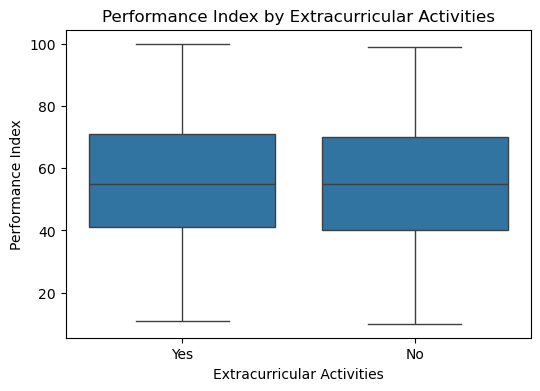

In [22]:
# Boxplot
plt.figure(figsize=(6,4))  # Control plot size

# Map 0 -'No', 1 -'Yes' for display only
sns.boxplot(
    x=Sp_df['Extracurricular Activities'].map({0: 'No', 1: 'Yes'}),
    y=Sp_df['Performance Index']
)

plt.title("Performance Index by Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.savefig('Performance by Extracurricular Activities.png', dpi = 300)
plt.show()

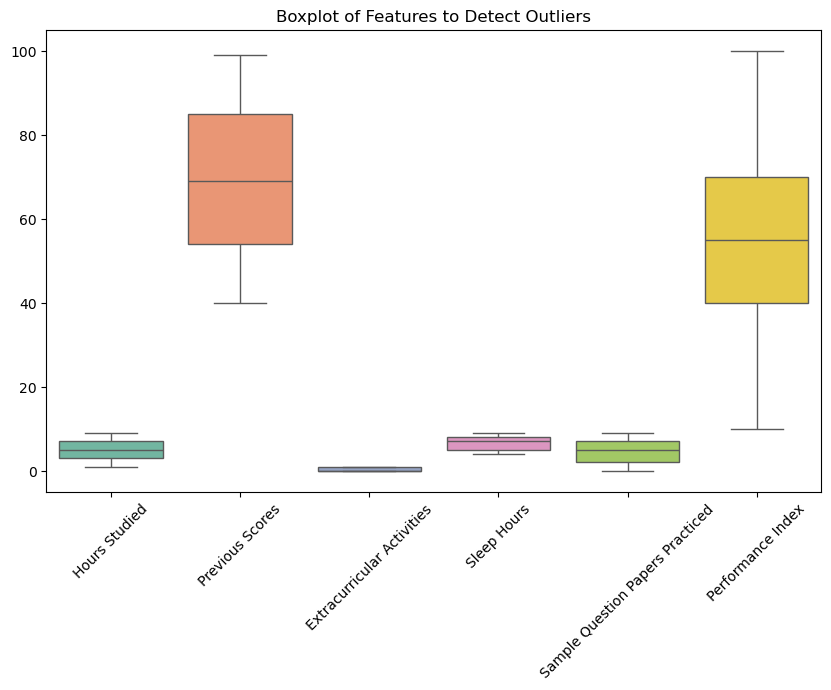

In [23]:
# Boxplot to detect outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=Sp_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.savefig("Boxplot of Features to Detect Outliers.png", bbox_inches='tight', dpi = 300)
plt.show()

#### **Load ML libraries**

In [24]:
# Modeling

# splitting
from sklearn.model_selection import train_test_split

# linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# tree-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# kernel / margin-based
from sklearn.svm import SVR

# gradient boosting (XGBoost)
from xgboost import XGBRegressor

# preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#### **Prepare Data for Modeling**

In [25]:
# Define features (X) and target (y)
X = Sp_df.drop(columns=["Performance Index"])
y = Sp_df["Performance Index"]

#### **Standardize the dataset**

In [26]:
# Feature Scaling

# Fit scaler only on training set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### **Split the dataset**

In [28]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### **Train the model**

**Linear Regression**

In [29]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression RMSE: 2.08, R²: 0.99


**Ridge Regression**

In [31]:
# Initialize and train the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [32]:
# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge Regression RMSE: 2.08, R²: 0.99


**Lasso Regression**

In [33]:
# Initialize and train the model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [34]:
# Predict on test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.2f}")

Lasso Regression RMSE: 2.08, R²: 0.99


**Decision Tree Regressor**

In [35]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("RMSE for Decision Tree: ", rmse_dt )
print("R² Score for Desision Tree: ", r2_dt) 
print(f"Decision Tree Regressor RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")

RMSE for Decision Tree:  3.045397255604668
R² Score for Desision Tree:  0.97507973322802
Decision Tree Regressor RMSE: 3.05, R²: 0.98


**Random Forest Regressor**

In [37]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest RMSE: 2.38, R²: 0.98


**Support Vector Regressor (SVR)**

In [39]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [40]:
# Predict on test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate SVR model performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
 
print("RMSE for SVR: ", rmse_svr )
print("R² Score for SVR: ", r2_svr)
print(f"Support Vector Regressor (SVR) RMSE: {rmse_svr:.2f}, R²: {r2_svr:.2f}")

RMSE for SVR:  2.3641392658698774
R² Score for SVR:  0.9849820416503269
Support Vector Regressor (SVR) RMSE: 2.36, R²: 0.98


**Gradient Boosting (XGBoost)**

In [41]:
# Initialize and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost RMSE: 2.17, R²: 0.99


**Compare Model Performances**

In [43]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf, rmse_svr, rmse_xgb],
    'R²': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_svr, r2_xgb]
})

results.sort_values(by='RMSE', inplace=True)
results

,Model,RMSE,R²
0,Linear Regression,2.075066,0.988430
1,Ridge Regression,2.075077,0.988430
2,Lasso Regression,2.076466,0.988415
6,XGBoost,2.172294,0.987321
5,Support Vector Machine,2.364139,0.984982
4,Random Forest,2.376113,0.984830
3,Decision Tree,3.045397,0.975080


**Model Performance Summary**

Linear, Ridge, and Lasso Regression achieved the best results (RMSE ≈ 2.07, R² ≈ 0.988), showing high accuracy and reliability. XGBoost, Random Forest, and SVM also performed well but offered no clear advantage. The Decision Tree had the weakest performance.

**Chosen Model:** I will proceed with Linear Regression as the best balance of accuracy and interpretability.

**Feature Importance Analysis (LR)**

In [44]:
# Get feature importance from LR model
feature_importance_lr = pd.Series(lr_model.coef_, index=X_scaled.columns).sort_values(ascending=False)

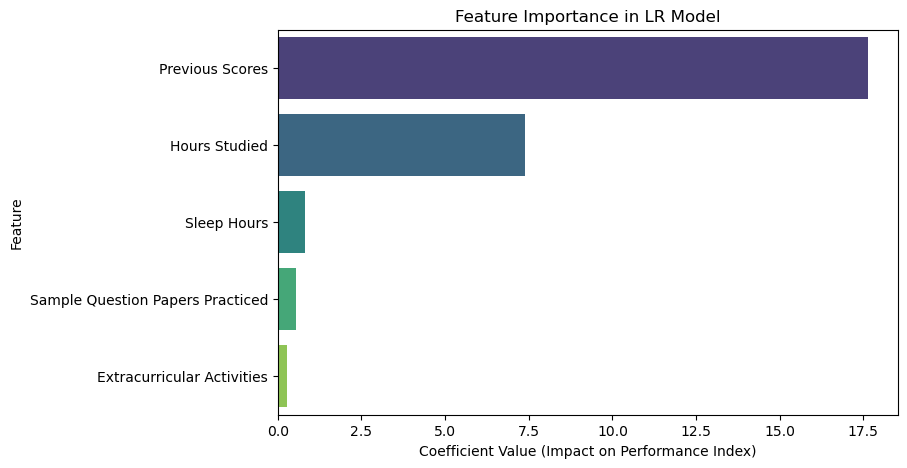

In [45]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_lr.values, y=feature_importance_lr.index, palette="viridis", hue = feature_importance_lr.index, legend = False)
plt.title("Feature Importance in LR Model")
plt.xlabel("Coefficient Value (Impact on Performance Index)")
plt.ylabel("Feature")
plt.savefig("Coefficient Value (Impact on Performance Index).png", dpi = 300)
plt.show()

In [46]:
# Display feature importance values
feature_importance_lr

Previous Scores                     17.644024
Hours Studied                        7.381153
Sleep Hours                          0.801390
Sample Question Papers Practiced     0.541024
Extracurricular Activities           0.286897
dtype: float64

**Feature Importance Analysis (Linear Regression)**

The analysis shows that Previous Scores (17.64) is by far the most influential factor in predicting student performance, meaning past academic achievement strongly determines future outcomes. 

Hours Studied (7.38) also plays a significant role, highlighting the importance of consistent study habits. 

Sleep Hours (0.80) and Sample Question Papers Practiced (0.54) have a smaller but still positive contribution. 

Extracurricular Activities (0.29) has the least impact, suggesting that while valuable for overall development, it contributes minimally to academic performance prediction in this dataset.

**Conclusion:** Prior academic performance and study time are the strongest predictors of student performance, while lifestyle and extracurricular factors play relatively minor roles.

#### **Make Predictions**

In [47]:
# Example: new/unseen student data

# One new student record
new_student = pd.DataFrame({
    'Hours Studied': [7],
    'Previous Scores': [75],
    'Extracurricular Activities': [1],  # 1 = Yes, 0 = No
    'Sleep Hours': [6],
    'Sample Question Papers Practiced': [3]
})

# Apply the SAME scaler used during training
new_student_scaled = scaler.transform(new_student)

# Predict Performance Index
predicted_score = lr_model.predict(new_student_scaled)

print("Predicted Performance Index:", predicted_score[0])

Predicted Performance Index: 66.33047825160402


In [48]:
# New unseen student records
new_students = pd.DataFrame({
    'Hours Studied': [2, 5, 8, 3, 6],
    'Previous Scores': [40, 60, 85, 55, 72],
    'Extracurricular Activities': [0, 1, 1, 0, 1],  # 1 = Yes, 0 = No
    'Sleep Hours': [4, 7, 6, 5, 8],
    'Sample Question Papers Practiced': [1, 2, 5, 1, 4]
})

# Apply the SAME scaler used during training
new_students_scaled = scaler.transform(new_students)

# Predict Performance Index
predicted_scores = lr_model.predict(new_students_scaled)

# Combine inputs and predictions for readability
results = new_students.copy()
results['Predicted Performance Index'] = predicted_scores

results

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Predicted Performance Index
0,2,40,0,4,1,14.534930
1,5,60,1,7,2,45.635349
2,8,85,1,6,5,79.743211
3,3,55,0,5,1,33.134480
4,6,72,1,8,4,61.557016


In [49]:
# Or
new_students["Predicted Performance Index"] = predicted_scores
new_students

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Predicted Performance Index
0,2,40,0,4,1,14.534930
1,5,60,1,7,2,45.635349
2,8,85,1,6,5,79.743211
3,3,55,0,5,1,33.134480
4,6,72,1,8,4,61.557016


#### **Conclusion**

I developed a Multiple Linear Regression model to predict student performance. The results showed that previous scores and hours studied were the most influential factors, while sleep, extracurricular activities, and practice questions had smaller effects. This highlights the importance of academic history and consistent study time in shaping student outcomes.

#### **Deployment on Streamlit**